In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import spatial
import time
import scipy.linalg
import healpy as hp

sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

%load_ext autoreload
%autoreload 2
%connect_info

/home/deparis/Emma
/home/deparis/Emma
{
  "control_port": 56604,
  "transport": "tcp",
  "stdin_port": 58005,
  "ip": "127.0.0.1",
  "shell_port": 54473,
  "signature_scheme": "hmac-sha256",
  "iopub_port": 40036,
  "hb_port": 33733,
  "key": "ad379414-e535-4e95-ab98-5b83a3c65343"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /run/user/1003/jupyter/kernel-6c3e77f2-704b-4828-89b0-2e52574cb1bd.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [6]:
runset=db.Runset()
runset.load()
runset.get_description()
runset.get_folder()

00 run de base -> m2
01 masse d'etoile *8 -> m1
02 même masse d'étoile mais pas de SN
03 masse d'etoile *8 mais pas de SN
04 masse d'étoile /8 -> m3
05 même masse d'étoile mais SN thermique
06 même masse d'étoile mais SN kin simple sans eject
07 même masse d'étoile mais SN kin simple avec eject
08 même masse d'étoile mais sans tirage de Poisson __ DOUTE
09 tout pareil mais avec flux __ PROBLEME
10 RERUN tout pareil mais avec flux
11 run de test
12 run de test avec contrainte sur la fraction d'ionisation au niveau des source
00 /home/deparis/curie_data/data/8_8_gather_6/
01 /home/deparis/curie_data/data/8_8_gather_7/
02 /home/deparis/curie_data/data/8_8_gather_8/
03 /home/deparis/curie_data/data/8_8_gather_9/
04 /home/deparis/curie_data/data/8_8_gather_10/
05 /home/deparis/curie_data/data/8_8_gather_11/
06 /home/deparis/curie_data/data/8_8_gather_12/
07 /home/deparis/curie_data/data/8_8_gather_13/
08 /home/deparis/curie_data/data/8_8_gather_14/
09 /home/deparis/curie_data/data/8_8_gathe

In [7]:
run1=io.Run(runset.runs[10].folder)

In [236]:
run2=io.Run(runset.runs[2].folder)

In [ ]:
plt.figure()

x=run1.param.avg.z
y=run1.param.avg.SFR
plt.plot(x,y)

plt.yscale('log')
plt.xlim(4,15)
observations.sfr()

plt.figure()

x=run1.param.avg.z
y=1-run1.param.avg.xion.mean
plt.plot(x,y)

plt.yscale('log')
plt.xlim(4,15)
observations.xion()

In [239]:
cat1=fof.Fof(run1.folder+"data/",17)
cat2=fof.Fof(run2.folder+"data/",12)

In [8]:
cur_run=run1
cur_step = run1.step_00017
cur_cat=cur_step.fof

# cur_run=run2
# cur_cat=cat2
# cur_step = run2.step_00012

In [7]:
cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.l.read()

cur_step.grid.field_d.read()
cur_step.grid.field_u.read()
cur_step.grid.field_v.read()
cur_step.grid.field_w.read()

cur_step.grid.rfield_fx0.read()
cur_step.grid.rfield_fy0.read()
cur_step.grid.rfield_fz0.read()

# cur_step.star.mass.read()
# cur_step.star.age.read()

In [248]:
#cur_cat.gen(8,cur_run.param.info.nproc)

cur_step.fof.read_masst()
cur_step.fof.read_struct()

cur_step.fof.get_R200()
#________________________________________________________________________
cur_step.fof.get_part(cur_step.part, force=0)
cur_step.fof.get_part_mass(cur_step.part,cur_run.param.info)

# cur_step.fof.get_part_fine(cur_step.part, force=0)
cur_step.fof.get_part_mass_fine()
#________________________________________________________________________
cur_step.fof.get_star(cur_step.star, force=0)
cur_step.fof.get_star_mass(cur_step.star,cur_run.param.info)

cur_step.fof.get_stars_fine(cur_step.grid, cur_step.star)
cur_step.fof.get_star_mass_fine(cur_step.star,cur_run.param.info)
#________________________________________________________________________
cur_step.fof.get_cells(cur_step.grid, force=0)
cur_step.fof.get_gas_mass(cur_step.grid,cur_run.param.info)

cur_step.fof.get_cells_fine(cur_step.grid)
cur_step.fof.get_gas_mass_fine(cur_step.grid,cur_run.param.info)
#________________________________________________________________________
cur_step.fof.get_mean_vel()

Reading fof masst
Reading fof struct
reading star_mass
reading star_x
reading star_y
reading star_z
ERROR : Can't automatically determine cells_fine


AttributeError: 

In [ ]:
baryon_frac1=(stars_mass_tot1+baryon_mass1)/ mass_tot1

In [243]:
cur_step.grid.xion.read()
cur_step.grid.l.read()

mean_xion=np.zeros(cur_step.fof.nfoftot)
for halo_num in range(cur_step.fof.nfoftot):
    cells=cur_step.fof.cells[halo_num]
    x=cur_step.grid.xion.data[cells]
    dv= np.power(0.5, 3*cur_step.grid.l.data[cells])
    V=np.sum( dv )
    mean_xion[halo_num]=np.sum(cur_step.grid.xion.data[cells] * dv)/V

AttributeError: 'Fields' object has no attribute 'xion'

In [ ]:
#healpix shere
nside = 2**4
x_healpix,y_healpix,z_healpix=hp.pix2vec(nside, range(hp.nside2npix(nside) ))

In [57]:
-

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
done
skipped 2727/23352 = 11.68 %


In [95]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))

mean_scal=cur_cat.mean_flux_rad_1_00

cur_cat.get_part_mass_fine()
x= cur_cat.part_mass_fine
y= cur_cat.mean_flux_rad_1_00

mask=mean_scal>0
ax1.plot(x[mask], y[mask],'.',c="#99ccff", label="%d positives values"%len( y[mask]))
# print(np.min(y[mask]), np.max(y[mask]))
mask= (mean_scal>0)  & (cur_cat.star_mass!=0)
ax1.plot(x[mask], y[mask],'.',c="#0000cc", label="%d got stars"%len( y[mask]))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc=4)

mask=mean_scal<0
ax2.plot(x[mask], -y[mask],'.', c="#ffcccc", label="%d negatives values"%len( y[mask]))
mask= (mean_scal<0) & (cur_cat.star_mass!=0)
ax2.plot(x[mask], -y[mask],'.', c="#ff5050", label="%d got stars"%len( y[mask]))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(loc=0)



# max_bound= max(np.max(y[y>0]),-np.min(y[y<0]))
# min_bound= min(np.min(y[y>0]),-np.max(y[y<0]))
# ax1.set_ylim(min_bound, max_bound)
# ax2.set_ylim(min_bound, max_bound)
# ax2.invert_yaxis()

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlabel("Halo Mass")
# plt.xlim(np.min(x), np.max(x))

<IPython.core.display.Javascript object>

ERROR : Can't automatically determine star_mass


AttributeError: 

# HYDRO

In [ ]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))
# ax1.set_title("Without Supernovae")

cur_cat.get_flux_r200(cur_step.grid, "hydro")
cur_cat.get_star(cur_step.star)
cur_cat.get_star_mass(cur_step.star)

x= cur_cat.part_mass_fine
y= cur_cat.mean_flux_hydro

mask=y>0
ax1.plot(x[mask], y[mask],'.',c="#99ccff", label="%d positives values"%len( y[mask]))
mask= (y>0)  & (cur_cat.star_mass!=0)
ax1.plot(x[mask], y[mask],'.',c="#0000cc", label="%d got stars"%len( y[mask]))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc=4)
ax1.set_ylabel("Mean hyro outflow")

mask=mean_scal<0
ax2.plot(x[mask], -y[mask],'.', c="#ffcccc", label="%d negatives values"%len( y[mask]))
mask= (y<0) & (cur_cat.star_mass!=0)
ax2.plot(x[mask], -y[mask],'.', c="#ff5050", label="%d got stars"%len( y[mask]))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(loc=0)
ax2.set_ylabel("Mean hyro inflow")

max_bound= max(np.max(y[y>0]),-np.min(y[y<0]))
min_bound= 10**np.int(np.log10(min(np.min(y[y>0]),-np.max(y[y<0]))))

ax1.set_ylim(min_bound, max_bound)
ax2.set_ylim(min_bound, max_bound)
ax2.invert_yaxis()

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlabel("Halo Mass")

plt.xlim(np.min(x), np.max(x))

<IPython.core.display.Javascript object>


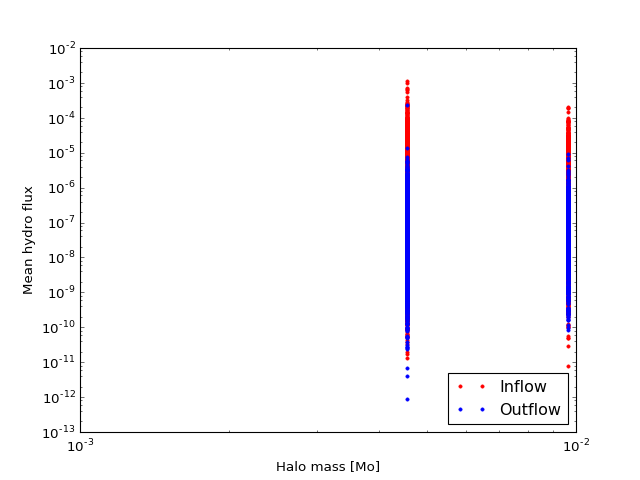

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 850566 but corresponding boolean dimension is 23352
/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 850566 but corresponding boolean dimension is 23352


In [246]:
plt.figure()

x= cur_cat.part_mass_fine
y= cur_cat.mean_flux_hydro

ymin=0

mask = y<-ymin
plt.plot(x[mask], -y[mask],'r.', label="Inflow")

mask = y>ymin
plt.plot(x[mask], y[mask],'b.', label="Outflow")

plt.legend(loc=4)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Halo mass [Mo]")
plt.ylabel("Mean hydro flux")

In [ ]:
mass_min= np.min(mass)
mass_max= np.max(mass)

nbins=12
bins=np.logspace(np.log10(mass_min),np.log10(mass_max),nbins+1)
x=(bins[1:]+bins[:-1])/2

w=-mean_scal_hydro

n,_=np.histogram(mass, bins=bins)
y,_=np.histogram(mass, bins=bins, weights=w)
y2,_=np.histogram(mass, bins=bins, weights=w*w)

err = np.sqrt(y2/n - y*y/n/n) /np.sqrt(n) *3

plt.figure()
plt.errorbar(x,y/n,yerr=err, fmt='o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Halo mass [Mo]")
plt.ylabel("Hydro inflow")

# RAD

In [ ]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))

mean_scal=mean_scal_rad

x= mass
y= mean_scal

mask=mean_scal>0
ax1.plot(x[mask], y[mask],'.',c="#99ccff", label="%d positives values"%len( y[mask]))
mask= (mean_scal>0)  & (stars_mass!=0)
ax1.plot(x[mask], y[mask],'.',c="#0000cc", label="%d got stars"%len( y[mask]))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc=4)

mask=mean_scal<0
ax2.plot(x[mask], -y[mask],'.', c="#ffcccc", label="%d negatives values"%len( y[mask]))
mask= (mean_scal<0) & (stars_mass!=0)
ax2.plot(x[mask], -y[mask],'.', c="#ff5050", label="%d got stars"%len( y[mask]))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(loc=0)

max_bound= max(np.max(y[y>0]),-np.min(y[y<0]))
min_bound= min(np.min(y[y>0]),-np.max(y[y<0]))
ax1.set_ylim(min_bound, max_bound)
ax2.set_ylim(min_bound, max_bound)
ax2.invert_yaxis()

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlabel("Halo Mass")
plt.xlim(np.min(x), np.max(x))

In [ ]:
plt.figure()

# x= baryon_mass1
x= mass
y= mean_scal_rad

ymin=0

mask = y>ymin
plt.plot(x[mask], y[mask],'r.', label="Outflow")

mask = y<-ymin
plt.plot(x[mask], -y[mask],'b.', label="Inflow")


plt.legend(loc=4)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Halo mass [Mo]")
plt.ylabel("Mean radiative flux")

In [ ]:
mass_min= np.min(mass)
mass_max= np.max(mass)

nbins=12
bins=np.logspace(np.log10(mass_min),np.log10(mass_max),nbins+1)
x=(bins[1:]+bins[:-1])/2


w=mean_scal_rad

n,_=np.histogram(mass, bins=bins)
y,_=np.histogram(mass, bins=bins, weights=w)
y2,_=np.histogram(mass, bins=bins, weights=w*w)
err=np.sqrt(y2/n - y*y/n/n) /np.sqrt(n) *3

plt.figure()
plt.errorbar(x,y,yerr=err, fmt='o--')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Halo mass [Mo]")
plt.ylabel("Radiative outflow")

In [ ]:
mass_min= np.min(mass)
mass_max= np.max(mass)

nbins=10
bins=np.logspace(np.log10(mass_min),np.log10(mass_max),nbins+1)
x=(bins[1:]+bins[:-1])/2

n,_=np.histogram(mass, bins=bins)
x,_=np.histogram(mass, bins=bins, weights=-mean_scal_hydro)
y,_=np.histogram(mass, bins=bins, weights=mean_scal_rad)

x/=n
y/=n

plt.figure()
plt.plot(x,y, 'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("hydro inflow")
plt.ylabel("rad outflow")

In [ ]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))

mean_scal=mean_scal_rad

x= mass[mean_scal_rad>=mean_scal_ref]
y= mean_scal[mean_scal_rad>=mean_scal_ref]

mask=mean_scal>0
ax1.plot(x[mask], y[mask],'.',c="#99ccff", label="%d positives values"%len( y[mask]))
mask= (mean_scal>0)  & (lmean<10)
mask= lmax == 11
ax1.plot(x[mask], y[mask],'.',c="#0000cc", label="%d got stars"%len( y[mask]))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc=4)

mask=mean_scal<0
ax2.plot(x[mask], -y[mask],'.', c="#ffcccc", label="%d negatives values"%len( y[mask]))
mask= (mean_scal<0) & (lmean<10)
ax2.plot(x[mask], -y[mask],'.', c="#ff5050", label="%d got stars"%len( y[mask]))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(loc=0)

max_bound= max(np.max(y[y>0]),-np.min(y[y<0]))
min_bound= min(np.min(y[y>0]),-np.max(y[y<0]))
ax1.set_ylim(min_bound, max_bound)
ax2.set_ylim(min_bound, max_bound)
ax2.invert_yaxis()

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlabel("Halo Mass")
plt.xlim(np.min(x), np.max(x))

In [ ]:
f, ((ax1, ax2), (ax3,ax4))  = plt.subplots( nrows=2, ncols=2, figsize=(10,10))

x= mean_scal_hydro
y= mean_scal_rad

mask= (x<0) & (y>0)
ax1.plot(-x[mask], y[mask],'.',c="#99ccff", label="%d positives values"%len( y[mask]))
mask= (x<0) & (y>0)  & (stars_mass!=0)
ax1.plot(-x[mask], y[mask],'.',c="#0000cc", label="%d got stars"%len( y[mask]))
ax1.set_yscale('log')
ax1.set_xscale('log')
# ax1.legend(loc=4)

mask= (x>0) & (y>0)
ax2.plot(x[mask], y[mask],'.', c="#99ccff", label="%d negatives values"%len( y[mask]))
mask= (x>0) & (y>0) & (stars_mass!=0)
ax2.plot(x[mask], y[mask],'.', c="#0000cc", label="%d got stars"%len( y[mask]))
ax2.set_yscale('log')
ax2.set_xscale('log')
# ax2.legend(loc=0)

mask= (x<0) & (y<0)
ax3.plot(-x[mask], -y[mask],'.',c="#99ccff", label="%d positives values"%len( y[mask]))
mask= (x<0) & (y<0)  & (stars_mass!=0)
ax3.plot(-x[mask], -y[mask],'.',c="#0000cc", label="%d got stars"%len( y[mask]))
ax3.set_yscale('log')
ax3.set_xscale('log')
# ax1.legend(loc=4)

mask= (x>0) & (y<0)
ax4.plot(x[mask], -y[mask],'.', c="#99ccff", label="%d negatives values"%len( y[mask]))
mask= (x>0) & (y<0) & (stars_mass!=0)
ax4.plot(x[mask], -y[mask],'.', c="#0000cc", label="%d got stars"%len( y[mask]))
ax4.set_yscale('log')
ax4.set_xscale('log')
# ax2.legend(loc=0)



# max_bound= max(np.max(y[y>0]),-np.max(y[y<0]))
# min_bound= min(np.min(y[y>0]),-np.min(y[y<0]))
# ax1.set_ylim(min_bound, max_bound)
# ax2.set_ylim(min_bound, max_bound)

xmin = 1e-6
xmax = 1e1
ymin = 1e-18
ymax = 1e1

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)

ax1.invert_xaxis()
ax3.invert_xaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

f.subplots_adjust(hspace=0)
f.subplots_adjust(wspace=0)

plt.setp([a.get_xticklabels() for a in f.axes[:-2]], visible=False)
plt.setp(f.axes[1].get_yticklabels(), visible=False)
plt.setp(f.axes[3].get_yticklabels(), visible=False)

ax1.set_ylabel("Radiative outflow")
ax3.set_ylabel("Radiative inflow")
ax3.set_xlabel("Hydro inflow")
ax4.set_xlabel("Hydro outflow")

In [ ]:
eig_val = np.empty(cat1.nfoftot, dtype=np.object)
eig_vec = np.empty(cat1.nfoftot, dtype=np.object)

for halo_num in range(cat1.nfoftot):
    
    #select halo in catalog
    xc =cat1.x[halo_num]
    yc =cat1.y[halo_num]
    zc =cat1.z[halo_num]
            
    part_x = cat1.part_pos[halo_num][0::3] - xc
    part_y = cat1.part_pos[halo_num][1::3] - yc
    part_z = cat1.part_pos[halo_num][2::3] - zc
        
    #inertia matrix
    A = [part_x, part_y, part_z]
    B = np.transpose(A)
    I = np.dot(A,B)

    eig_val[halo_num], eig_vec[halo_num] = scipy.linalg.eig(I)

In [ ]:
ellips1=np.zeros(cat1.nfoftot)
ellips2=np.zeros(cat1.nfoftot)

for i in range(cat1.nfoftot):
    v=eig_val[i]
    arg = np.argsort(v)
    a=v[arg[2]]
    b=v[arg[1]]
    c=v[arg[0]]
    
    ellips1[i]= b/a
    ellips2[i]= c/a
    

In [ ]:
x=ellips1
y=ellips2

cm = plt.get_cmap('gist_rainbow')
color = cm(halo_mass/np.max(halo_mass))

plt.figure()
plt.plot(x,y,'.', c=color)
# plt.xscale('log')
# plt.yscale('log')

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_l allready loaded, use force=1 to reload
grid_field.u allready loaded, use force=1 to reload
grid_field.v allready loaded, use force=1 to reload
grid_field.w allready loaded, use force=1 to reload
grid_rfield.fx[0] allready loaded, use force=1 to reload
grid_rfield.fy[0] allready loaded, use force=1 to reload
grid_rfield.fz[0] allready loaded, use force=1 to reload


<IPython.core.display.Javascript object>


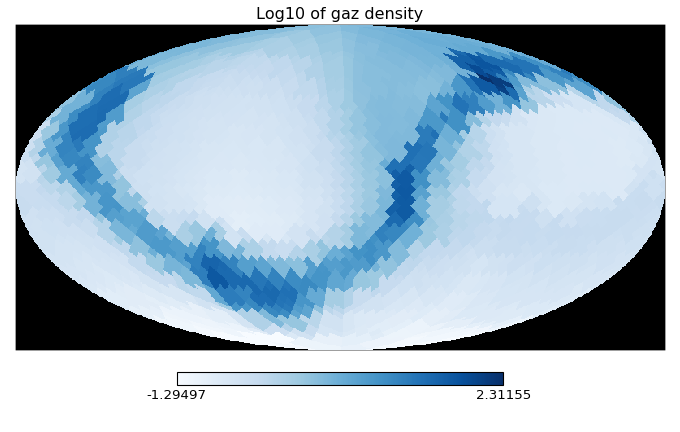

<IPython.core.display.Javascript object>


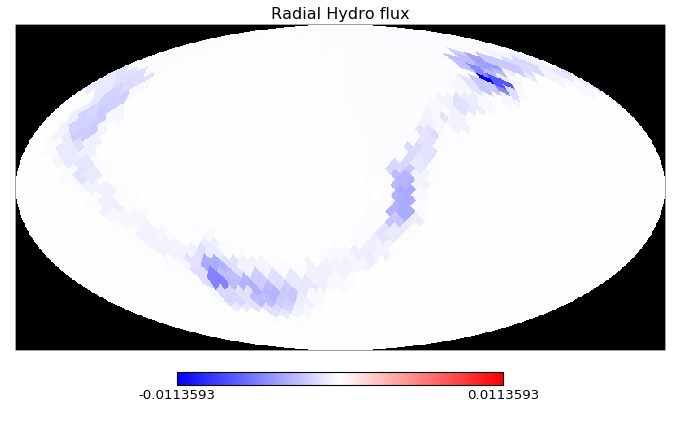

<IPython.core.display.Javascript object>


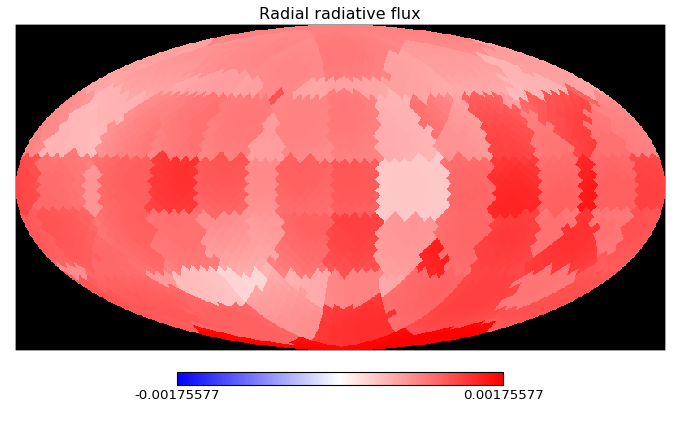

In [18]:
cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.l.read()
cur_step.grid.field_u.read()
cur_step.grid.field_v.read()
cur_step.grid.field_w.read()
cur_step.grid.rfield_fx0.read()
cur_step.grid.rfield_fy0.read()
cur_step.grid.rfield_fz0.read()


arg= np.argsort(cur_cat.npart)[::-1]

halo_num = arg[4]

#select halo in catalog
xc =cur_cat.x[halo_num]
yc =cur_cat.y[halo_num]
zc =cur_cat.z[halo_num]
R200=cur_cat.R200[halo_num]
cells = cur_cat.cells[halo_num]

# get cell size
l_grid = cur_step.grid.l.data[cells]
dx = np.power(0.5,l_grid)

# get halo cells, set cell-centred coordinate, center on the halo and normalized
x_grid = (cur_step.grid.x.data[cells] +dx/2. -xc)/R200
y_grid = (cur_step.grid.y.data[cells] +dx/2. -yc)/R200
z_grid = (cur_step.grid.z.data[cells] +dx/2. -zc)/R200

# hydro flux in halo frame
fx_hydro=cur_step.grid.field_d.data[cells]*(cur_step.grid.field_u.data[cells]-cur_cat.mean_vel[halo_num][0])
fy_hydro=cur_step.grid.field_d.data[cells]*(cur_step.grid.field_v.data[cells]-cur_cat.mean_vel[halo_num][1])
fz_hydro=cur_step.grid.field_d.data[cells]*(cur_step.grid.field_w.data[cells]-cur_cat.mean_vel[halo_num][2])

# radiative flux
fx_rad=cur_step.grid.rfield_fx0.data[cells]
fy_rad=cur_step.grid.rfield_fy0.data[cells]
fz_rad=cur_step.grid.rfield_fz0.data[cells]

#reference flux
fx_ref=np.ones(len(cells))
fy_ref=np.zeros(len(cells))
fz_ref=np.zeros(len(cells))

#healpix shere
nside = 2**4
x_healpix,y_healpix,z_healpix=hp.pix2vec(nside, range(hp.nside2npix(nside) ))

#associate grid point to healpix point
tree = spatial.cKDTree(np.transpose( (x_grid,y_grid,z_grid)) )
idx = tree.query(np.transpose((x_healpix,y_healpix,z_healpix)))[1]

#scalar product
S=4*np.pi*R200**2

scal_hydro=( x_healpix*fx_hydro[idx] +
             y_healpix*fy_hydro[idx] +
             z_healpix*fz_hydro[idx] )  *S

scal_rad=  ( x_healpix*fx_rad[idx] +
             y_healpix*fy_rad[idx] +
             z_healpix*fz_rad[idx] )    *S

scal_ref = ( x_healpix*fx_ref[idx] +
             y_healpix*fy_ref[idx] +
             z_healpix*fz_ref[idx] )     *S


#inertia matrix
part_x = cur_cat.part_pos[halo_num][0::3] - cur_cat.x[halo_num]
part_y = cur_cat.part_pos[halo_num][1::3] - cur_cat.y[halo_num]
part_z = cur_cat.part_pos[halo_num][2::3] - cur_cat.z[halo_num]

A = [part_x, part_y, part_z]
B = np.transpose(A)
I = np.dot(A,B)

eig_val,eig_vec = scipy.linalg.eig(I)
args = np.argsort(eig_val)[::-1]

theta, phi = hp.vec2dir(eig_vec[:,args[0]])
# theta*=180/np.pi
# phi*=180/np.pi


# khi = np.arccos( np.dot(eig_vec[args[2]], I[args[0]]/eig_val[args[0]]  ) )
# khi*=180/np.pi
# print(khi)

# theta=0
# phi=0
khi=0

# r=hp.Rotator((theta, phi))

# theta, phi = hp.vec2dir(eig_vec[:,args[2]])
# print(r.angle_ref(theta, phi,0))


# print(hp.rotator.rotateVector(r.mat, eig_vec[:,args[2]] ) )

cmap=cm.Blues
cmap.set_under("k") # sets background to white

den = cur_step.grid.field_d.data[cells][idx]
hp.mollview(np.log10(den), cmap=cmap, rot=(theta,phi,khi), title="Log10 of gaz density")
# hp.graticule(local=0)


cmap=cm.bwr
cmap.set_under("k") # sets background to white

clim= max( abs(np.min(scal_hydro)),abs(np.max(scal_hydro)))
hp.mollview(scal_hydro, cmap=cmap, min=-clim,max=clim, rot=(theta,phi,khi), title="Radial Hydro flux")
# hp.graticule(local=0)

clim= max( abs(np.min(scal_rad)),abs(np.max(scal_rad)))
hp.mollview(scal_rad, cmap=cmap, min=-clim,max=clim, rot=(theta,phi,khi), title="Radial radiative flux")
# hp.graticule(local=0)

<IPython.core.display.Javascript object>


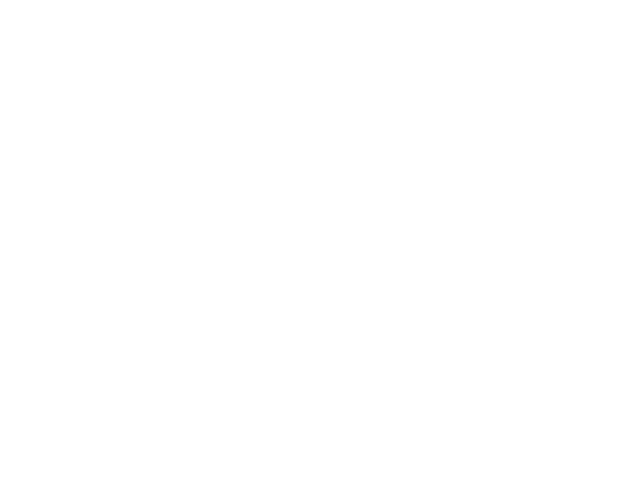

IndexError: index 16436 is out of bounds for axis 0 with size 3072

In [20]:
plt.figure()

n=1000
data = np.empty(n, dtype=np.object)
for i in np.arange(0,n):

#     y = hp.anafast(scal_rad_data[arg[i]])
    y = hp.anafast(scal_hydro[arg[i]])    
#     y = hp.map2alm(scal_hydro_data[arg[i]])    
    
#     y/=y[1]
    
    
    data[i]=y
    plt.plot(y,':.')
plt.xscale('log')
plt.yscale('log')

<IPython.core.display.Javascript object>


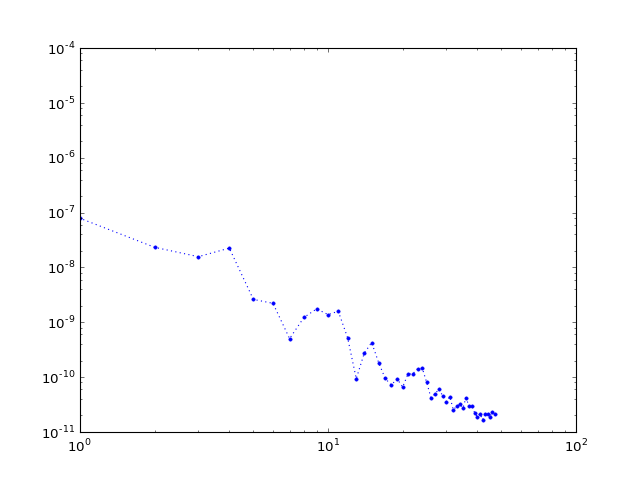

In [28]:
plt.figure()

y = hp.anafast(scal_hydro)
y = hp.anafast(scal_rad)
    
plt.plot(y,':.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
n=48
mean=np.zeros(n)
# for i in range(n):    
#     for j in range(100):
#         mean[i]+=data[j][i]/100
        
for i in range(n):        
    mean[i]=np.mean(data[:][i])
        
plt.figure()
plt.plot(mean)
plt.xscale('log')
plt.yscale('log')

In [ ]:
# y = hp.anafast(scal_rad_data[arg[0]])
# print(y[0])
# mean/=mean[1]

y=mean#/mean[1]
map = hp.sphtfunc.synfast(y, 2**4)

cmap=cm.bwr
cmap.set_under("k") # sets background to white


clim= max( abs(np.min(map)),abs(np.max(map)))
hp.mollview(map, cmap=cmap, min=-clim,max=clim, rot=(theta,phi,khi), title="")

In [ ]:
clim= max( abs(np.min(scal_ref)),abs(np.max(scal_ref)))
hp.mollview(scal_ref, cmap=cool_cmap, min=-clim,max=clim, rot=(0,90,0), title="Ref")
hp.graticule(local=0)

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')


scat = ax.scatter(x_grid[idx],y_grid[idx],z_grid[idx], '.', c=scal, cmap = 'bwr')
# scat = ax.scatter(x,y,z, '.', c=scal, cmap = 'bwr')
clim=max( abs(np.min(scal)), abs(np.max(scal)))
scat.set_clim(-clim,clim)
col = fig.colorbar(scat)
ax.set_axis_off()

In [ ]:
y,bins=np.histogram(scal, bins=16)
x=(bins[1:]+bins[:1])/2
plt.figure()
plt.plot(x,y, 'o--')
# plt.xscale('log')
plt.yscale('log')

In [87]:
from scipy import integrate
def a2t_quad(az):

    o_m=0.316
    o_v=1.-o_m

    H0=67
    H0 = H0*1e3/1e6/3.08567758e16*(365*24*3600) # Hubble constant in SI unit

    def f(a):
        return a/ np.sqrt(o_m*a + o_v*a**4 )

    return 1./H0 * integrate.quad(f,0,az)[0]

In [89]:
stars=cur_step.star

a=cur_step.star.mass._tsim
print(a)
t=a2t_quad(a)
unit_m=run1.param.info.unit_mass
luminosity.get_all_flux(stars,t,a,unit_m)

flux = cur_step.star.flux

n=cat1.nfoftot
flux_tot1=np.zeros(n)
for i in range(n):
    stars=cat1.stars[i]
    flux_tot1[i]=np.sum(flux[stars])    
mag1=luminosity.flux2mag(flux_tot1[flux_tot1!=0])

0.15


AttributeError: 'Field' object has no attribute 'data'

In [ ]:
nbins=16
plt.figure()

mag_min= np.min(mag1)
mag_max= np.max(mag1)

bins=np.linspace(mag_min,mag_max,nbins+1)
_x=(bins[1:]+bins[:-1])/2
dx=np.diff(_x)

################################################################################

n1,_=np.histogram(mag1,bins=bins)
err1=np.sqrt(n1)
box_size=run1.param.info.box_size_hm1_Mpc
plt.errorbar(_x[1:],n1[1:]/dx/ (box_size/0.67)**3,label="1/8")

x,y=observations.luminosity_function_fit(6)
plt.plot(x,y,'k--')

plt.ylim(1e-4,1e-0)
plt.yscale("log", nonposy='mask')
# plt.legend(loc=0)

In [21]:
f,ax = plt.subplots(1)

x= mag1
y= mean_scal_rad[stars_mass_tot1!=0]


mask = y>0
ax.plot(x[mask], y[mask],'b.', label="Outflow")

mask = y<0
ax.plot(x[mask], -y[mask],'r.', label="Inflow")

ax.invert_xaxis()


plt.legend(loc=4)
# plt.xscale('log')
plt.yscale('log')

plt.xlabel("Mag")
plt.ylabel("rad flux")

<IPython.core.display.Javascript object>

NameError: name 'mag1' is not defined

# RAD FLUX FUNCTION OF MEAN IONISATION

<IPython.core.display.Javascript object>


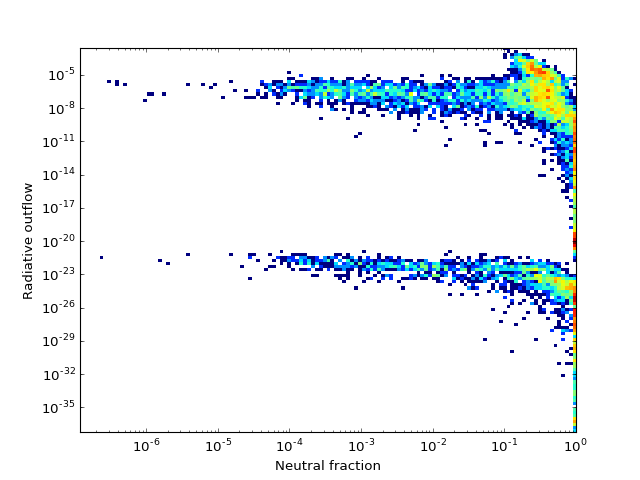

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


In [92]:
# cur_step.fof.get_cells_fine(cur_step.grid)
# cur_step.fof.get_flux_r200(cur_step.grid, "rad", force=0)

mask = cur_step.fof.mean_flux_rad_1_00>0

x=np.zeros(cur_step.fof.nfoftot)
for halo_num in range(cur_step.fof.nfoftot):
    x[halo_num] =1.-np.mean(cur_step.grid.xion.data[cur_step.fof.cells_fine[halo_num]])

y=cur_step.fof.mean_flux_rad_1_00

x=x[mask]
y=y[mask]

nbins=128
xbins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)), nbins)
ybins=np.logspace(np.log10(np.min(y)),np.log10(np.max(y)), nbins)

h,_,_=np.histogram2d(y,x,bins=(ybins,xbins))


plt.figure()
extent = (np.min(x),np.max(x),np.min(y),np.max(y))
# extent = (0.,1.,0.,1.)
plt.imshow(np.log10(h),interpolation="nearest", origin='lower', extent=extent, aspect='auto')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutral fraction')
plt.ylabel('Radiative outflow')

# Out flow function of halo mass

In [90]:
cur_step.star.age.read(force=1)
cur_step.star.mass.read(force=1)

a=cur_step.star.age._tsim
t=a2t_quad(a)

modelmag, modelage = luminosity.getModel()
age = t - cur_step.star.age.data

mass = cur_step.star.mass.data/1.9891e30*cur_run.param.info.unit_mass/1e6

mags=np.interp(age,modelage,modelmag)
flux = mass * luminosity.mag2flux(mags)
    
flux_tot=np.zeros(cur_step.fof.nfoftot)
for i in range(cur_step.fof.nfoftot):    
    flux_tot[i]=np.sum(flux[cur_step.fof.stars[i]])

reading star_age
reading star_mass


AttributeError: 

In [263]:
Nbins=8

mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
_x=(Mbins[1:]+Mbins[:-1])/2

fout_tot=np.zeros(Nbins)
fin_tot=np.zeros(Nbins)

for i in range(Nbins):
        
    mask = np.where( (mh>=Mbins[i])  & (mh<Mbins[i+1]) )[0]
    
    fout_tot[i]=np.sum(mean_scal_rad[mask])
    fin_tot[i]=np.sum(flux_tot[mask])

<IPython.core.display.Javascript object>


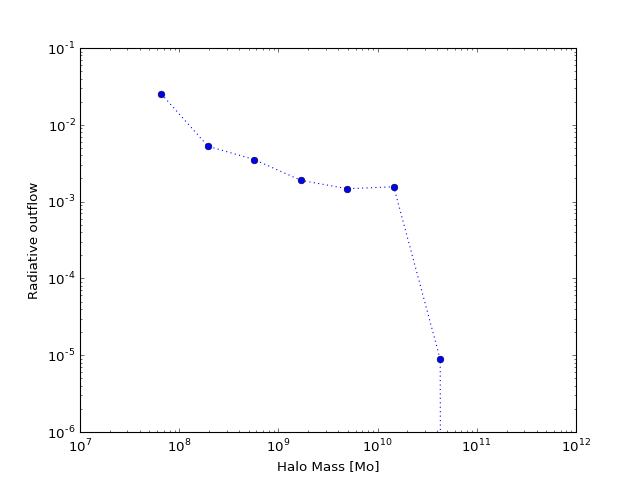

In [264]:
x=_x
y=fout_tot

plt.figure()
plt.plot(x,y,'o:')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Radiative outflow')

<IPython.core.display.Javascript object>


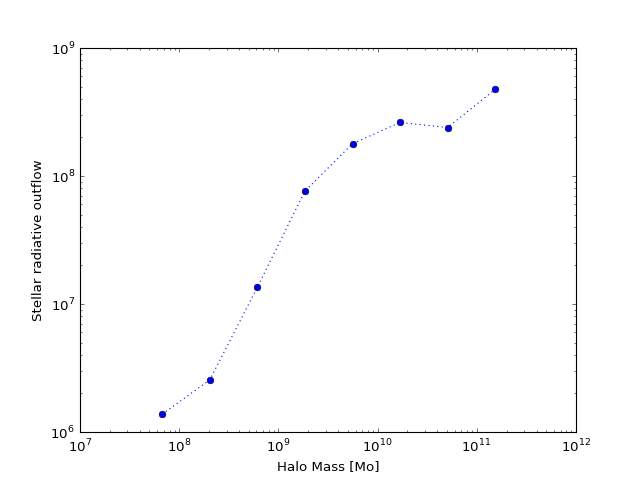

In [227]:
x=_x
y=fin_tot

plt.figure()
plt.plot(x,y,'o:')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Stellar radiative outflow')

<IPython.core.display.Javascript object>


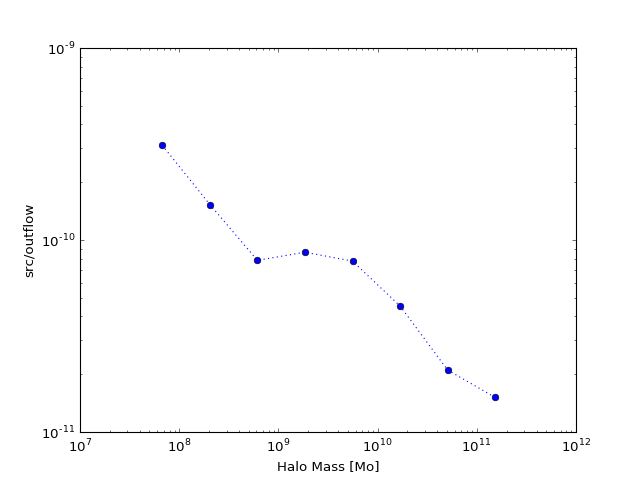

In [228]:
x=_x
y=fout_tot/fin_tot

plt.figure()
plt.plot(x,y,'o:')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Halo Mass [Mo]')
plt.ylabel('src/outflow')